# Data Visualization in Python I

Python offers multiple visualization libraries packed with lots of cool features. Python allows you to creat highly customized plots and even add some interaction behaviour to them. These are the most popular libraries for visualization in python: 

* [__Matplotlib:__](https://matplotlib.org/) A low level and powerful library providing lots of freedom, but often requires more coding and knowldge. 
* [__Pandas Visualization:__](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) It's an easy to use, handy interface built on top of Matplotlib.
* [__Seaborn:__](https://seaborn.pydata.org/index.html) Another high-level interface focused on providing nice styles easily. 
* [__ggplot:__](http://ggplot.yhathq.com/) It is based on R’s [ggplot2](https://ggplot2.tidyverse.org/), uses a [Grammar of Graphics](https://www.springer.com/gp/book/9780387245447).
* [__Plotly:__](https://plotly.com/python/) Similar to seaborn incorporating interactive visualizations.

In this notebook we will learn how to create basic plots using Matplotlib, Pandas Visualization and Seaborn as well as how to use some specific features of each library. We will be using the Iris and Wine Reviews datasets.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load iris dataset
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# Load Wine Reviews dataset
wine_reviews = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Matplotlib

This is the most popular python plotting library. Its low-level interface offers lots of freedom at the cost of having to write more code. Matplotlib can be imported with:

In [3]:
import matplotlib.pyplot as plt

### Scatter plot

Plot scatter plots of y vs. x calling [`scatter()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html). You can vary marker type, size and color.

Text(0,0.5,'sepal_width')

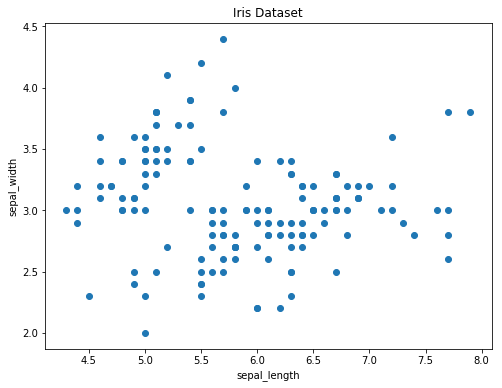

In [4]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot sepal_length vs. sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])

# Title and axis labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can incorporate the class info by color-coding each dot in the scatterplot. First, we create a dictionary mapping classes names to color. Then, we escatter each point on its own using a for-loop and choosing the respective color.

Text(0,0.5,'sepal_width')

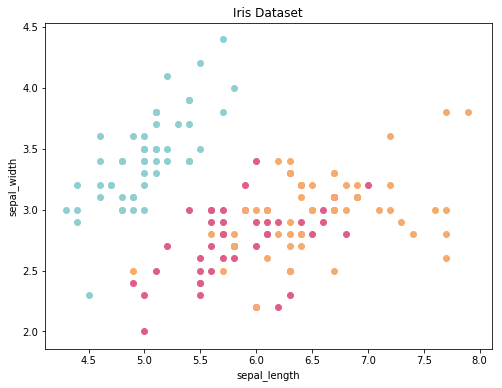

In [5]:
# Color dictionary {Class:color(HEX coded)}
colors = {'Setosa':'#8fcfd1', 'Versicolor':'#df5e88', 'Virginica':'#f6ab6c'}

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot color coded points
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
    
# Title and axis labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line chart

Plot y versus x as lines (or markers) with [`plot()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)

In [ ]:
# Get columns classes
columns = iris.columns.drop(['class'])

# x range (0 to #rows)
x_data = range(0, iris.shape[0])

# Create figure
fig, ax =  plt.subplots(figsize=(8,6))

# Plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
    
# Title and axis labels
ax.set_title('Iris Dataset')
ax.legend()

### Histogram
The [`hist()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) method in Matplotlib helps us to create histograms. Passing categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Histogram, we can customize the number of bins 
ax.hist(wine_reviews['points'],bins=20)

# Title and axis labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar chart

The bar-chart is useful to show quantities in categorical data that doesn’t have a lot of different categories. If we want to show an histogram using the [`bar()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.bar.html) interface, then it is no going to automatically compute the frequency of a category, so we can use pandas `value_counts()` function to do this:

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Count the occurrence of each class 
data = wine_reviews['points'].value_counts() 

# X and Y data
points = data.index 
frequency = data.values 

# Plot bars
ax.bar(points, frequency) 

# Title and axis labels
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

### Heatmaps
We can display heatmaps using [`imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html).

In [ ]:
# Correlation matrix
corr = iris.corr()
fig, ax = plt.subplots(figsize=(6,6))

# Heatmap
im = ax.imshow(corr.values)

# Labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels a bit
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

## Pandas Visualization

Pandas Visualization simplifies visualizations generated out of a pandas dataframe and series. In fact, it is a higher level API than Matplotlib and therefore we need less code for the same results at the cost of less versatility. 

### Scatter plot
Notice we only need one line of code to display a [`scatter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) plot. Axis labels are automatically  inferred from columns. 

In [ ]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

### Line chart
Different from raw Matplotlib where we needed to loop through each column we wanted to plot, in Pandas it is not necessary because it automatically plot all available numeric columns calling [`line()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html).

In [ ]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

### Histogram

Draw an histogram using [`hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html).

In [ ]:
wine_reviews['points'].plot.hist(bins=20)

It is also quite easy to plot multiple histograms for each column in our datasets:

In [ ]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### Bar chart

First, let's count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method. Finally, we can plot the resulting data using [`bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

Horizontal bars can be generated with [`barh()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html).

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

One last example with data from a different column:

In [ ]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:15].plot.bar()

### Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is based on Matplotlib and provides a high-level interface for creating very appealing graphs. You can create graphs in one line that would take multiple lines in Matplotlib. Additionally, seaborn's interface directly handles pandas dataframes. You can import it by typing:

In [ ]:
import seaborn as sns

### Scatter plot
Draw a scatter plot with possibility of several semantic groupings using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

Notice how easy is to add color to each data point compared to Matplotlib:

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Line chart

To create a line-chart we can use [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html). 

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Histogram

To create a histogram in Seaborn we use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) method. We need to pass it the column we want to plot and occurrences are computed automatically. Similar to other libs, we can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate (*kde*) over the bars.

In [ ]:
sns.distplot(wine_reviews['points'], bins=20, kde=False)

In [ ]:
sns.distplot(wine_reviews['points'], bins=20, kde=True)

### Bar chart
Bar charts can be created using the [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) method and passing the data.

In [ ]:
sns.countplot(wine_reviews['points'])

### Heatmaps

It is very simple to plot heatmaps using Seaborn [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
sns.heatmap(iris.corr(), annot=True)

### Box plots
Using Seaborn it is very easy to show other types of graphs. Box plots are useful to display the five-number summary:
* sample minimum (smallest observation)
* lower quartile or first quartile
* median (the middle value)
* upper quartile or third quartile
* sample maximum (largest observation)


Box plots, like bar charts, are great for data with only a few categories but can get messy really quickly. You can generate them with Seaborn using [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

### Faceting

Faceting consists of breaking data variables up across multiple subplots and combining those subplots into a single figure. Faceting is useful if you want to quickly explore your dataset. To use one kind of faceting in Seaborn we can use [`sns.FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) and pass it our data as well as a row or column, which will be used to split the data. Then, we need to call the map function on our FacetGrid object and define the plot type we want to use, as well as the column we want to graph. In our example we are using [`sns.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [ ]:
# Split data by class category
g = sns.FacetGrid(iris, col='class')

# Plot sepal_length per class
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot
Seaborn [`sns.PairPlot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) enable you to plot a grid of pairwise relationships in a dataset.

In [ ]:
sns.pairplot(iris)

Alternatively, you can use [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) in pandas.

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)